In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
%matplotlib notebook


In [2]:
np.random.seed(1)

def f(x):
    # try to predict this function
    return x * np.sin(x)

In [3]:
X = np.atleast_2d([1., 3., 5., 6, 7, 8]).T

# observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE

x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [4]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [5]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [6]:
y_pred, sigma = gp.predict(x, return_std=True)

In [17]:
sigma.shape

(1000,)

<IPython.core.display.Javascript object>


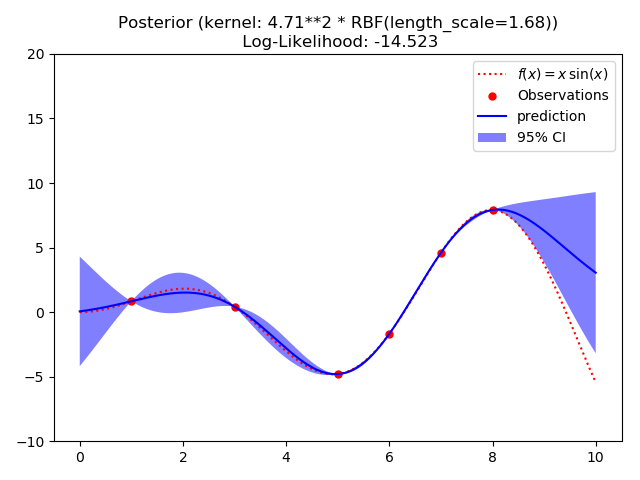

In [8]:
plt.figure()
plt.plot(x, f(x), 'r:', label='$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, '-b', label='prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                         (y_pred + 1.96 * sigma)[::-1]]),
         alpha=0.5, fc='b', ec='None', label='95% CI')

plt.ylim(-10, 20)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f" % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.legend()
plt.tight_layout()

In [9]:
np.concatenate([x, x[::-1]])

array([[ 0.        ],
       [ 0.01001001],
       [ 0.02002002],
       ..., 
       [ 0.02002002],
       [ 0.01001001],
       [ 0.        ]])

## With noise

In [10]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

In [11]:
y = f(X).ravel()
dy = 0.5 + 1. * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [12]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

In [13]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=array([  1.19066e+00,   3.29427e+01,   2.26479e+00,   2.98839e+01,
         2.66155e-01,   4.25430e-01,   1.50568e+00,   2.98565e-01,
         1.99813e-02,   1.07644e-02,   1.83527e-02,   2.36557e-01,
         9.04941e-01,   6.51187e-02,   2.79164e-02,   1.44247e-02,
         2.81258e-02,   4.24212e-02,   5.50023e+00,   3.45427e-01]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [14]:
y_pred, sigma = gp.predict(x, return_std=True)

<IPython.core.display.Javascript object>


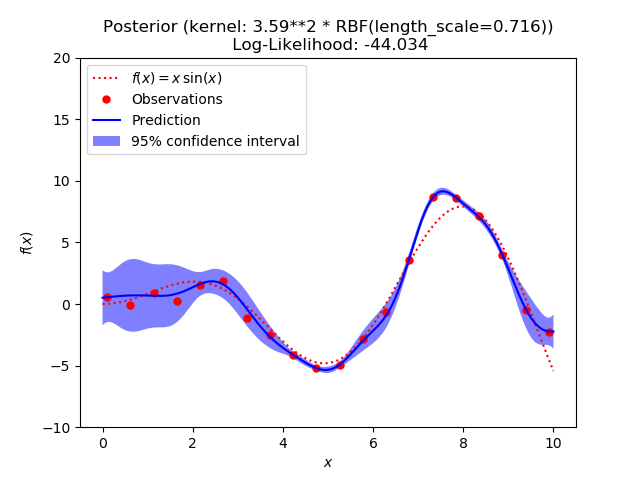

In [96]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f" % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.legend(loc='upper left')

## 2d Version

In [127]:
def f(x, y):
    
#     assert(xy.shape[1] == 2)
    
#     x = xy[:, 0]
#     y = xy[:, 1]
    
    return np.sin(x * y)

In [134]:
X = np.atleast_2d([1., 3., 5., 6, 7, 8]).T
Y = np.atleast_2d([1., 3., 5., 6, 7, 8]).T

Xa, Ya = np.meshgrid(X, Y)
XY = np.array([thing for thing in zip(Xa.flatten(), Ya.flatten())])

zs = np.array([f(a,b) for a,b in XY])
z = zs.reshape(Xa.shape)

# # xy = np.mgrid[df['Lon'].min():df['Lon'].max():30j, df['Lat'].min():df['Lat'].max():30j].reshape(2,-1).T
# x = np.linspace(df['Lon'].min(), df['Lon'].max(), heatmap_size)
# y = np.linspace(df['Lat'].min(), df['Lat'].max(), heatmap_size)
# x, y = np.meshgrid(x, y)
# xy = np.array([thing for thing in zip(x.flatten(), y.flatten())])

In [143]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

xa, ya = np.meshgrid(x, y)
xy = np.array([thing for thing in zip(xa.flatten(), ya.flatten())])

z_preds = np.array([f(a,b) for a,b in xy])
z_pred = z_preds.reshape(xa.shape)

In [141]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(XY, zs)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [142]:
# z_pred, sigma = gp.predict(xy, return_std=True)

<IPython.core.display.Javascript object>


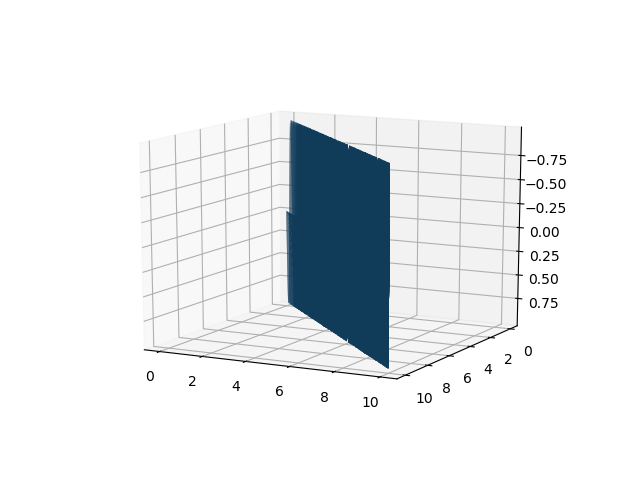

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(XY[:, 0], XY[:, 1], z)
ax.plot_surface(x, y, z_pred)

<IPython.core.display.Javascript object>


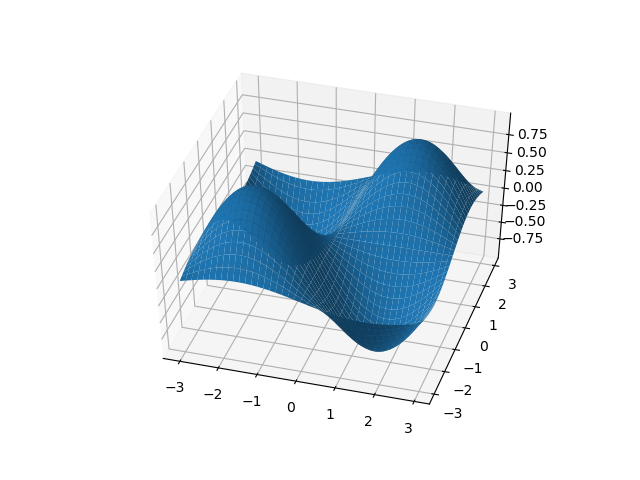

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)